# **Análise de Dados Pré-Respetivo Tratamento**

## Imports

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# matplotlib inline

## Carregar os dataset de treino e de teste

In [2]:
%run "../datasets/parse.ipynb"
train_df = parse_train("../")

## Exploração de dados

In [46]:
train_df.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2022-01-01     0           0.0                    0.486                0.0   
1  2022-01-01     1           0.0                    0.429                0.0   
2  2022-01-01     2           0.0                    0.463                0.0   
3  2022-01-01     3           0.0                    0.545                0.0   
4  2022-01-01     4           0.0                    0.439                0.0   

  Injeção na rede (kWh)          dt city_name   temp  feels_like  temp_min  \
0                  None  1640995200     local  16.59       16.00     16.21   
1                  None  1640998800     local  16.59       16.00     16.21   
2                  None  1641002400     local  16.59       16.03     15.67   
3                  None  1641006000     local  13.59       12.75     11.61   
4                  None  1641009600     local  14.97       14.27     14.72   

   temp_max  pressure sea_level grnd_level  humidity  wind_speed rain_1h  \
0     16.72      1024                             65        3.15           
1     16.72      1024                             65        3.14           
2     16.72      1024                             66        3.12           
3     16.16      1023                             67        3.08           
4     15.66      1023                             67        3.12           

   clouds_all weather_description  
0          97     overcast clouds  
1          58       broken clouds  
2          23          few clouds  
3          22          few clouds  
4          15          few clouds

In [47]:
train_df.describe()

Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  2256.000000   2256.000000              2256.000000        2256.000000   
mean     11.500000      0.223668                 0.217759           0.114014   
std       6.923721      0.394510                 0.346768           0.178273   
min       0.000000      0.000000                 0.000000           0.000000   
25%       5.750000      0.000000                 0.000000           0.000000   
50%      11.500000      0.000000                 0.000000           0.000000   
75%      17.250000      0.333000                 0.356000           0.236000   
max      23.000000      3.251000                 2.613000           1.127000   

                 dt         temp   feels_like     temp_min     temp_max  \
count  2.256000e+03  2256.000000  2256.000000  2256.000000  2256.000000   
mean   1.645054e+09    11.658839    10.652021    10.287030    12.544637   
std    2.345024e+06     3.564752     3.916314     3.743377     3.447436   
min    1.640995e+09     0.320000    -2.190000    -0.590000     1.330000   
25%    1.643025e+09     9.140000     7.875000     7.720000    10.110000   
50%    1.645054e+09    11.495000    10.780000    10.340000    12.370000   
75%    1.647084e+09    13.960000    13.142500    12.720000    14.720000   
max    1.649113e+09    21.820000    21.080000    21.210000    22.720000   

          pressure     humidity   wind_speed   clouds_all  
count  2256.000000  2256.000000  2256.000000  2256.000000  
mean   1023.065603    73.417110     2.581835    50.583333  
std       6.289268    16.656148     1.196707    42.194883  
min    1008.000000    20.000000     0.060000     0.000000  
25%    1018.000000    61.000000     1.790000     1.000000  
50%    1025.000000    76.000000     2.430000    53.000000  
75%    1028.000000    88.000000     3.142500    97.000000  
max    1034.000000    99.000000     9.140000   100.000000

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    2256 non-null   object 
 6   dt                       2256 non-null   int64  
 7   city_name                2256 non-null   object 
 8   temp                     2256 non-null   float64
 9   feels_like               2256 non-null   float64
 10  temp_min                 2256 non-null   float64
 11  temp_max                 2256 non-null   float64
 12  pressure                 2256 non-null   int64  
 13  sea_level                2256 non-null   object 
 14  grnd_level              

- Quantidade de valores únicos de cada feature

In [49]:
for column in train_df.columns:
    train_df[column].value_counts()

- Análise dos valores da feature **avg_precipitation**

In [50]:
train_df['wind_speed'].value_counts()

wind_speed
1.98    17
2.63    15
2.87    15
2.64    15
2.53    15
        ..
5.15     1
5.18     1
4.67     1
3.84     1
0.36     1
Name: count, Length: 517, dtype: int64

- Definição do primeiro e do terceiro quartis
- Definição do valor máximo (*upper*) e mínimo (*lower*)

In [51]:
numeric_columns = ['Hora', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
                   'dt', 'temp','feels_like','temp_min','temp_max','pressure','humidity', 'wind_speed','clouds_all']
#'rain_1h'
categorical_columns = ['Data', 'Injeção na rede (kWh)', 'city_name', 'weather_description','sea_level','grnd_level']


In [52]:
whiskers = []

for num in numeric_columns:
    Q1 = train_df[num].quantile(0.25)
    Q3 = train_df[num].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    whiskers.append((num, lower, upper))

print(whiskers)

[('Hora', -11.5, 34.5), ('Normal (kWh)', -0.49950000000000006, 0.8325), ('Horário Económico (kWh)', -0.534, 0.89), ('Autoconsumo (kWh)', -0.354, 0.59), ('dt', 1636936200.0, 1653172200.0), ('temp', 1.9100000000000001, 21.19), ('feels_like', -0.026250000000000107, 21.04375), ('temp_min', 0.21999999999999797, 20.220000000000002), ('temp_max', 3.1949999999999976, 21.635), ('pressure', 1003.0, 1043.0), ('humidity', 20.5, 128.5), ('wind_speed', -0.23875000000000002, 5.171250000000001), ('clouds_all', -143.0, 241.0)]


## Visualização gráfica dos dados

- Matriz de correlação para valores numéricos

<Axes: >

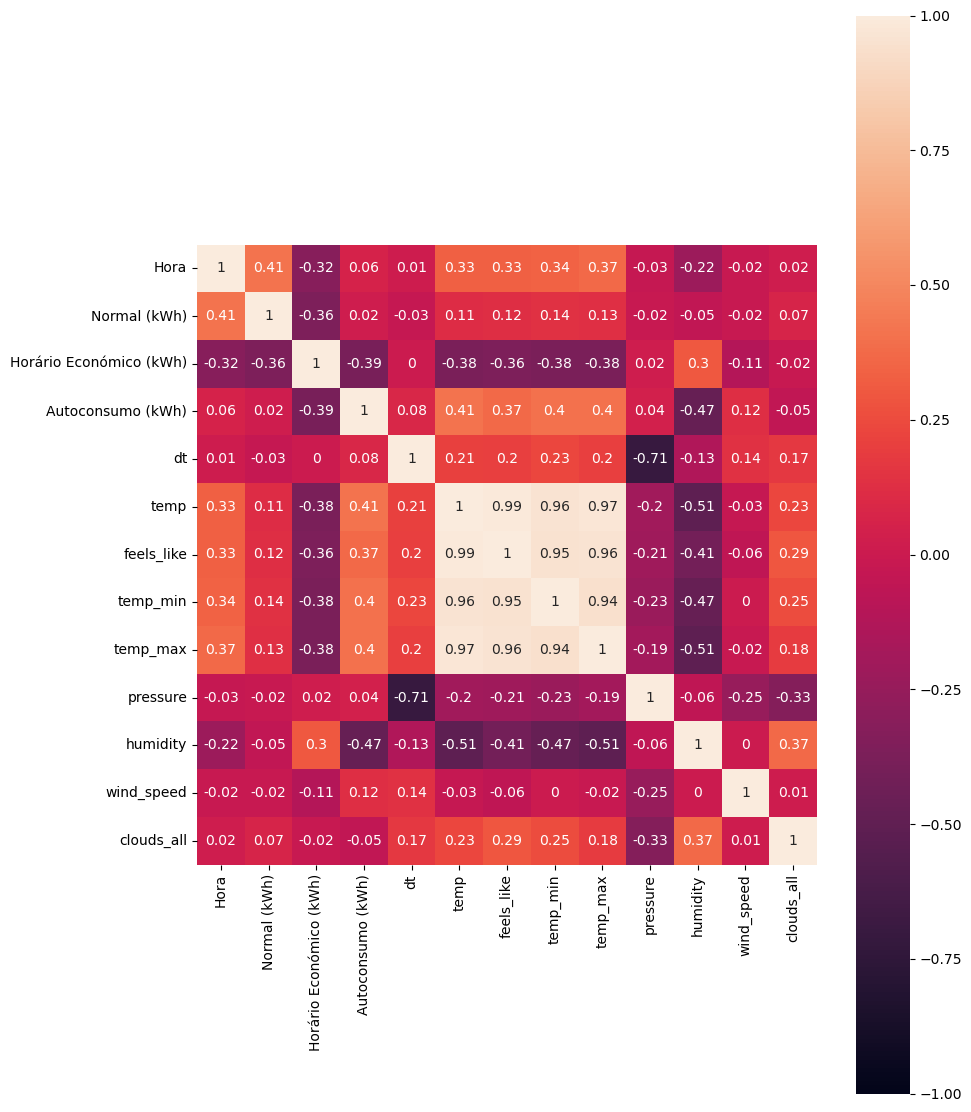

In [53]:
numeric_columns = train_df.select_dtypes(include=[np.number])
correlationMatrix = numeric_columns.corr().round(2)
f, ax = plt.subplots(figsize=(10, 14))
sns.heatmap(correlationMatrix, vmin=-1, vmax=1, square=True, annot=True)

- Distribuições bivariadas de pares num conjunto de dados

c:\Users\Henrique Fernandes\.conda\envs\envNAME\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


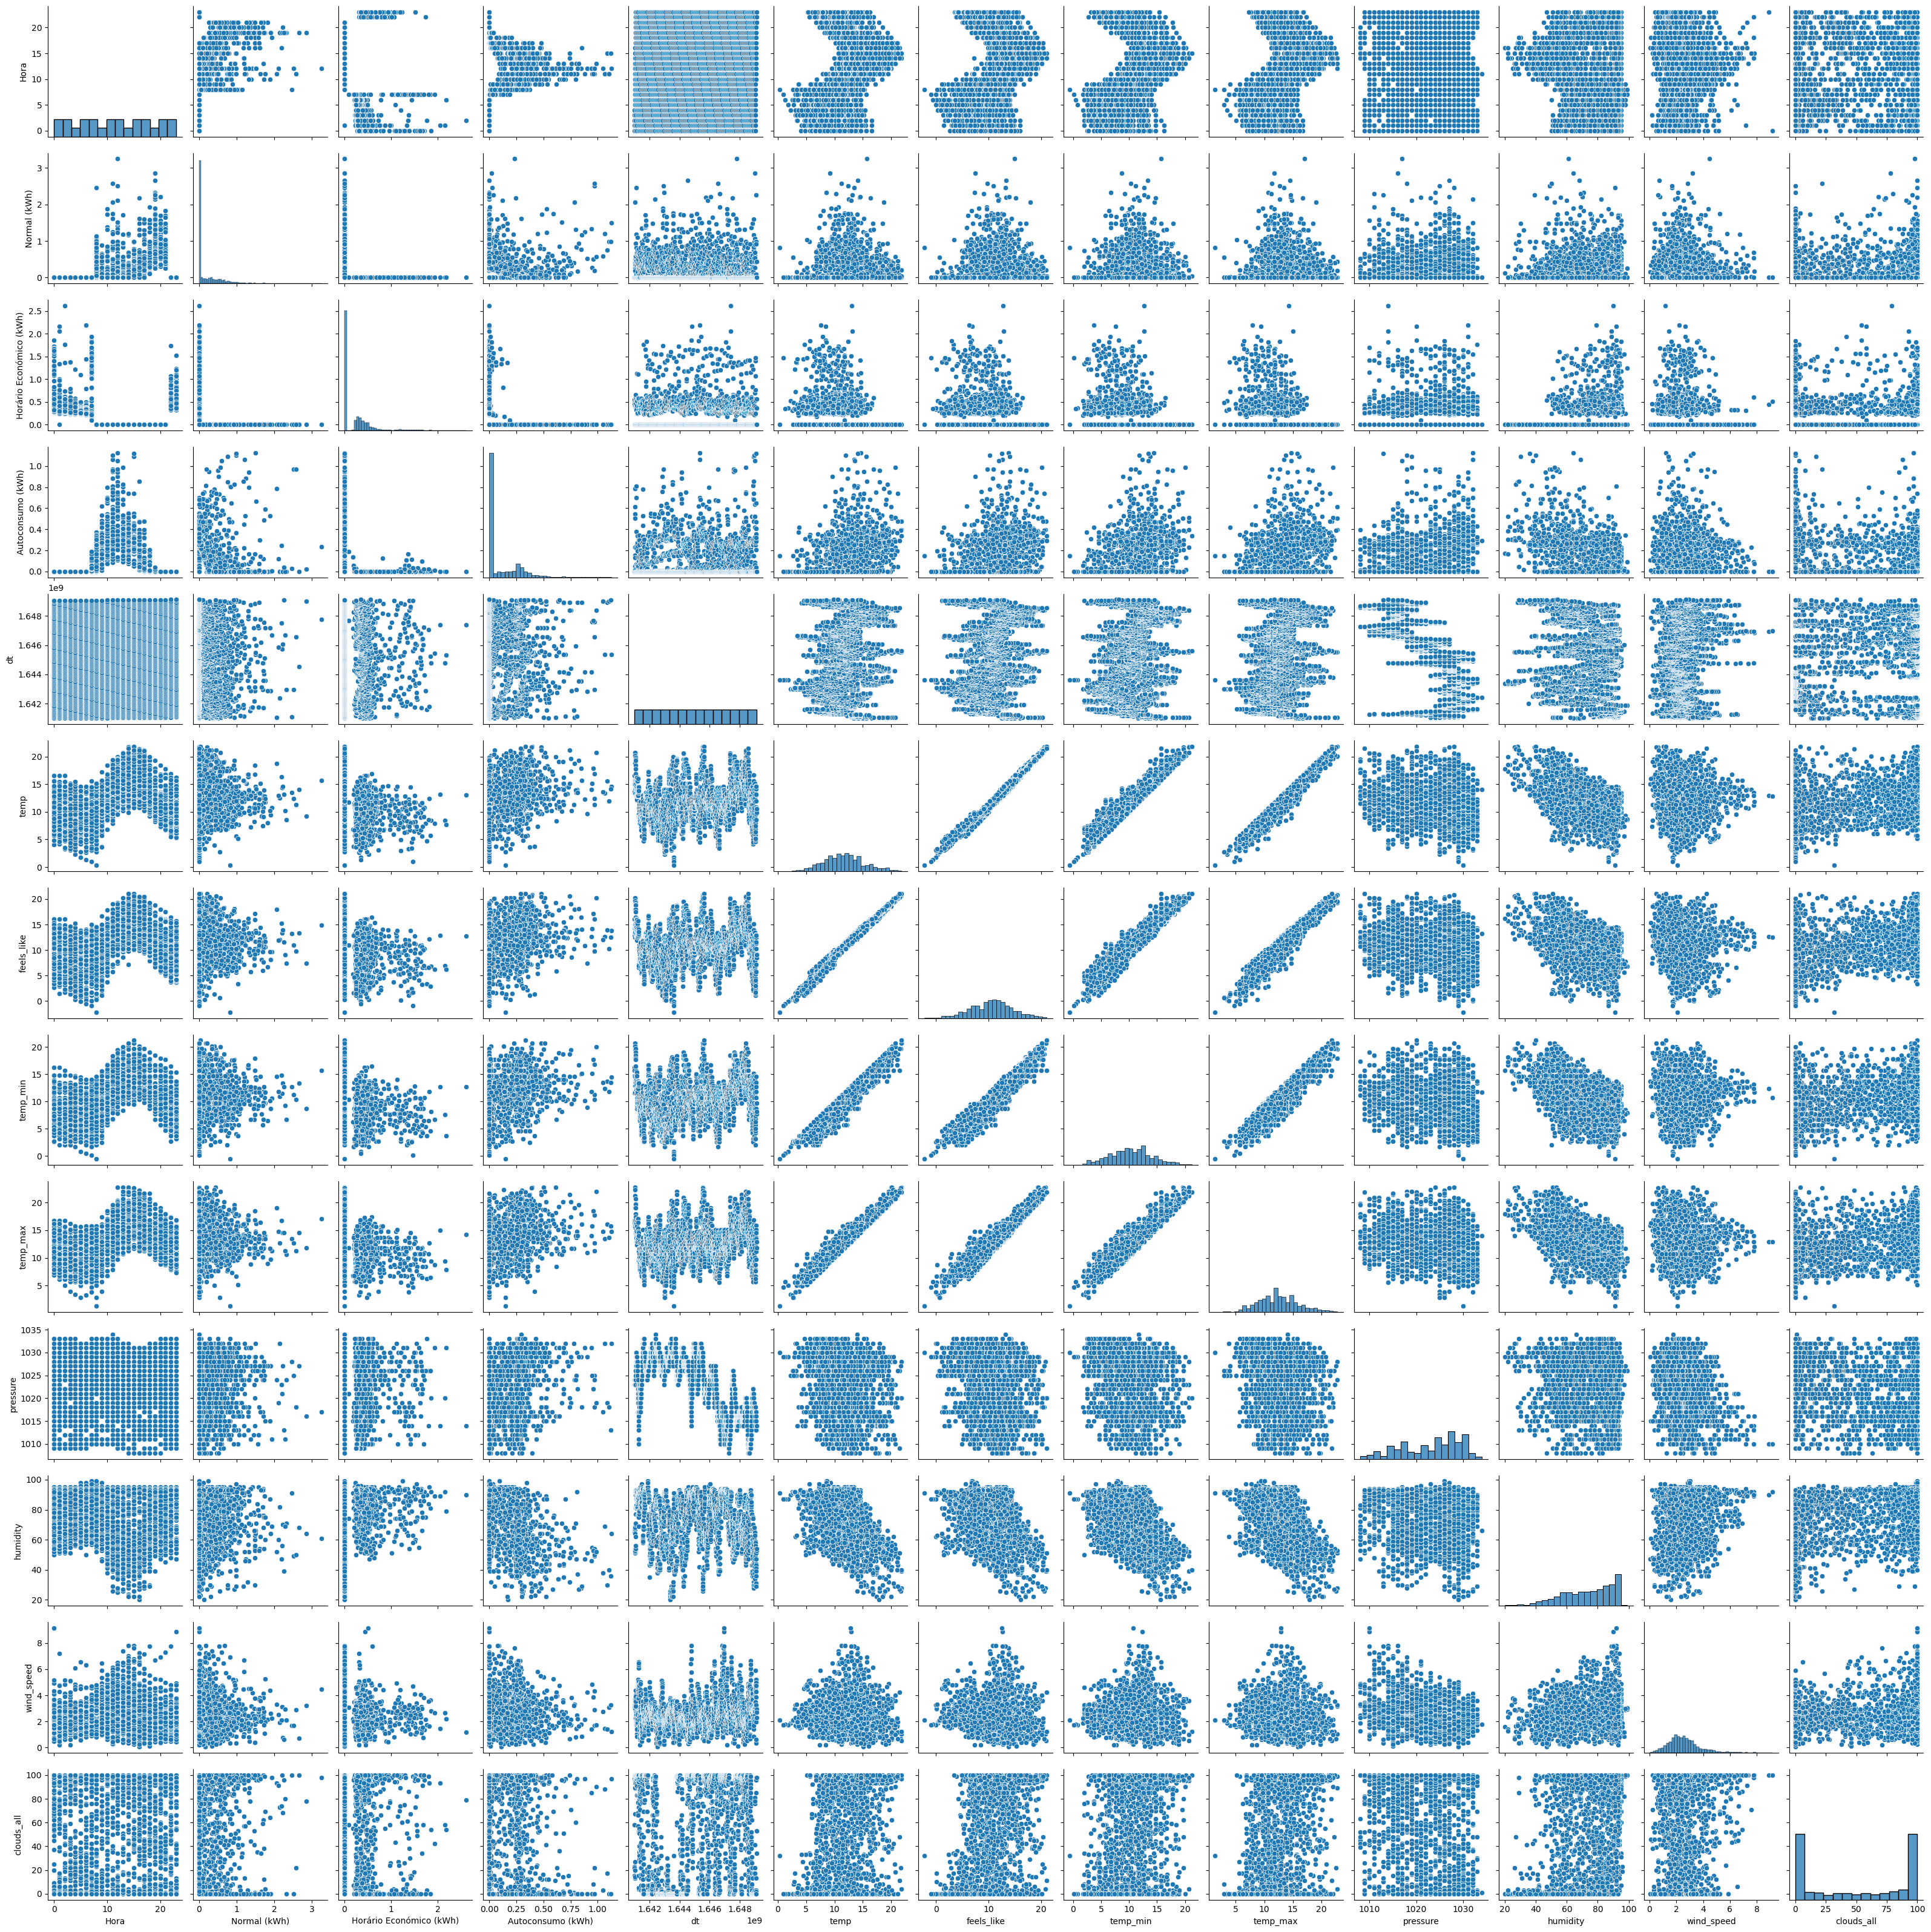

In [54]:
sns.pairplot(train_df)

- Diagrama de caixa para cada feature numérica

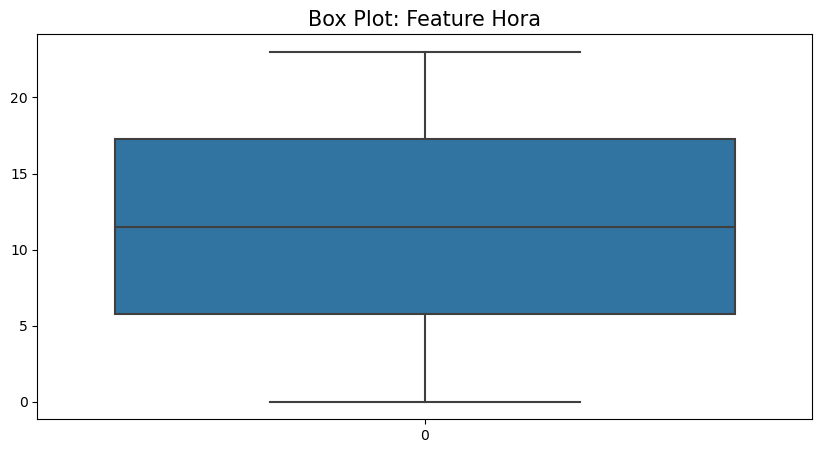

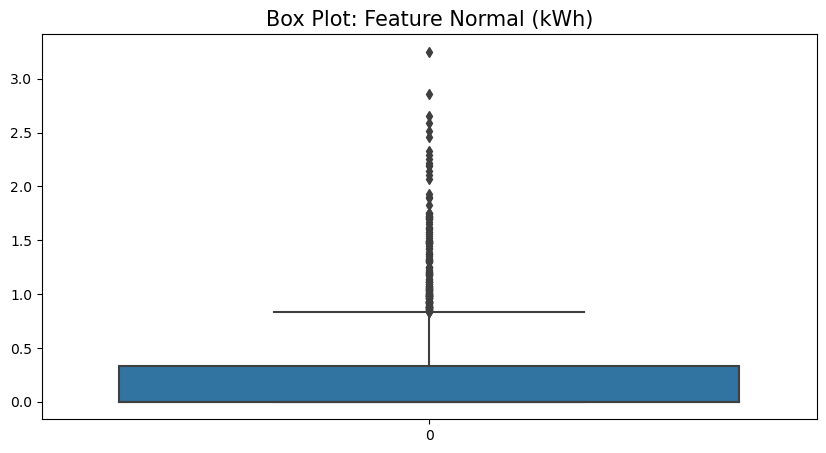

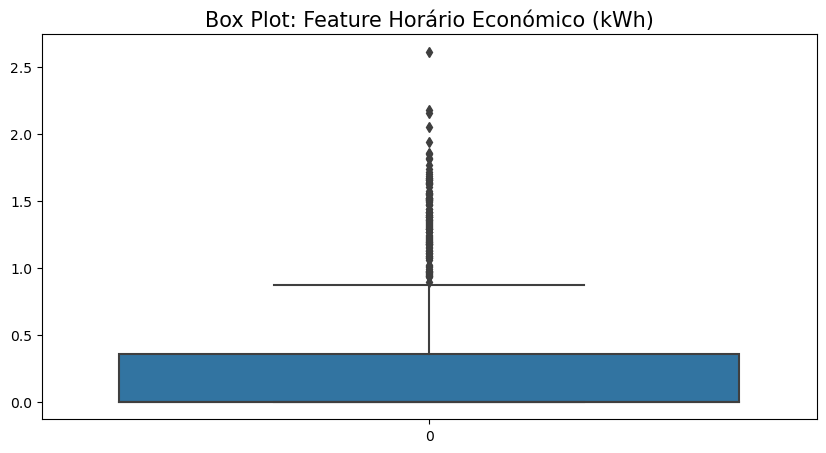

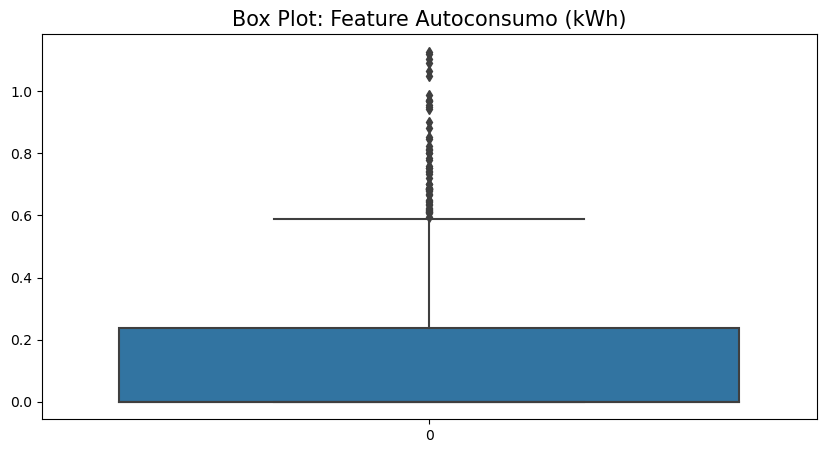

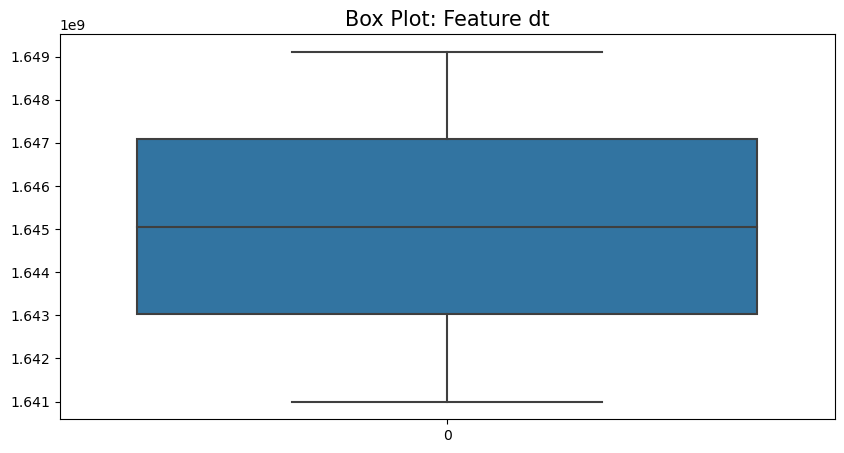

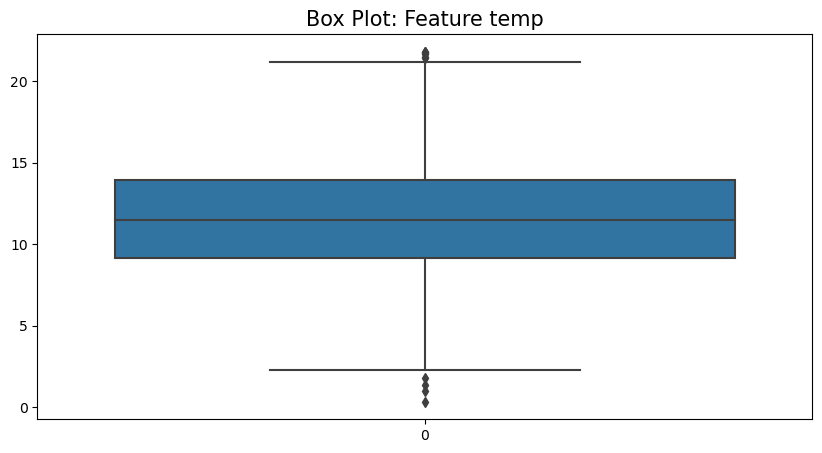

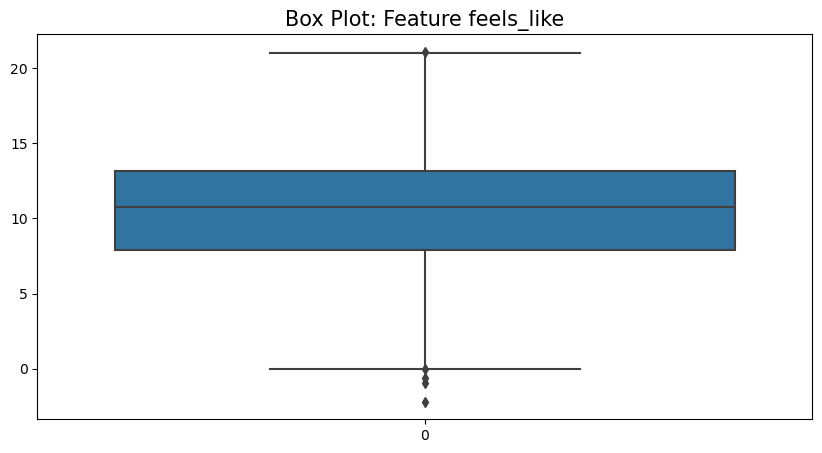

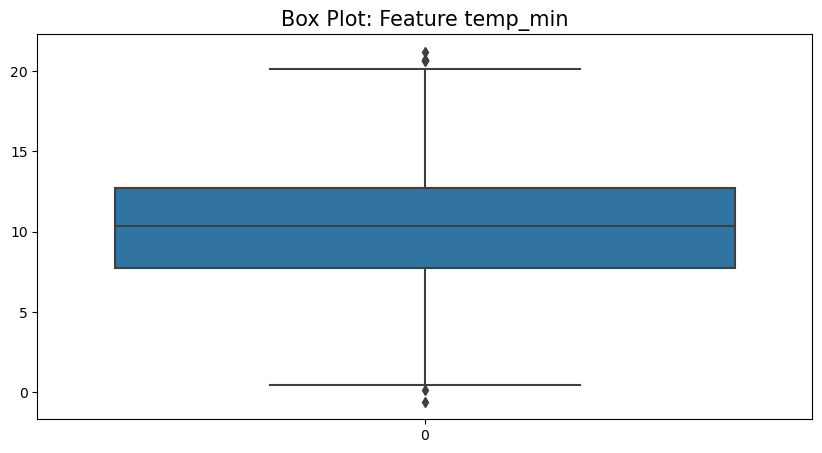

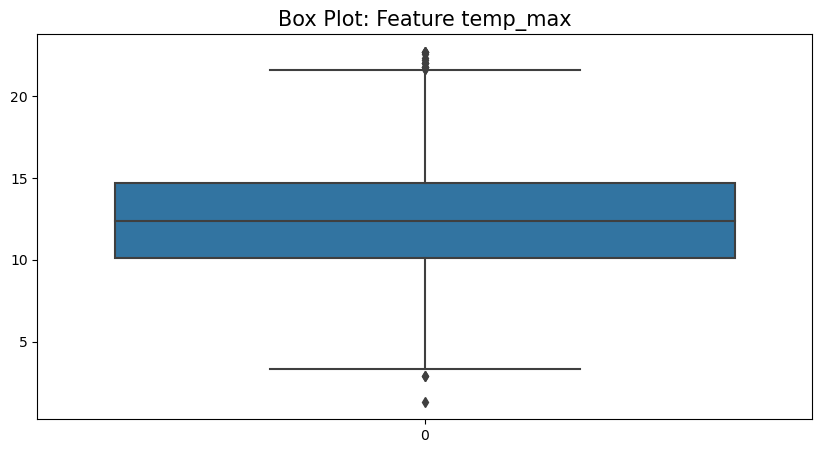

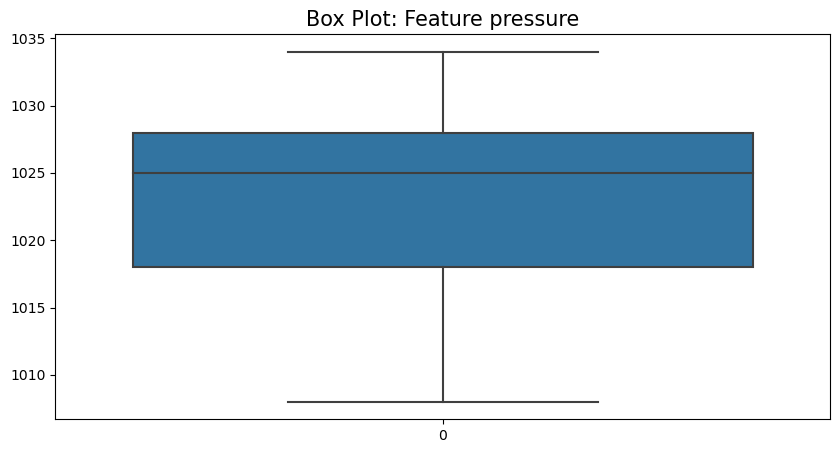

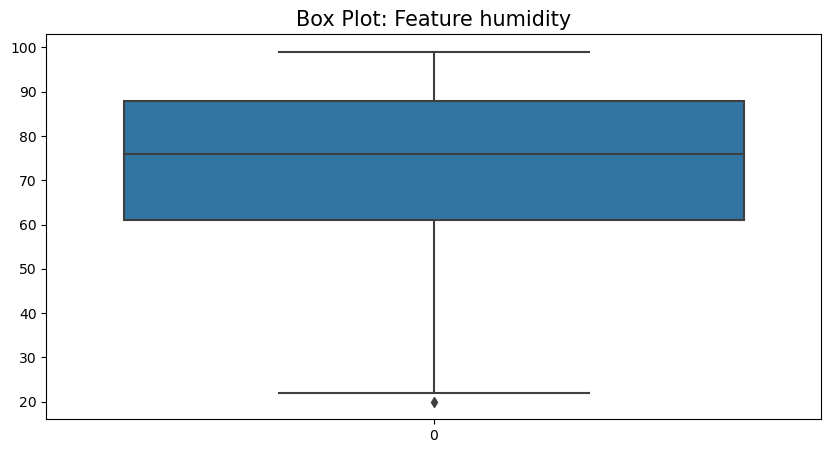

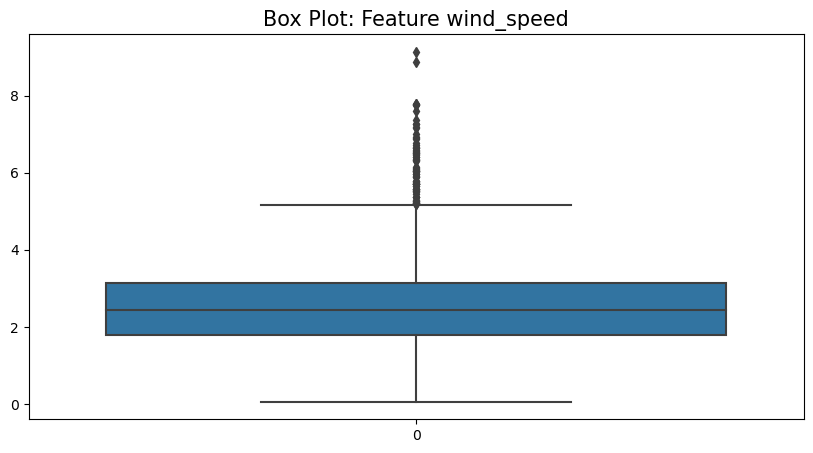

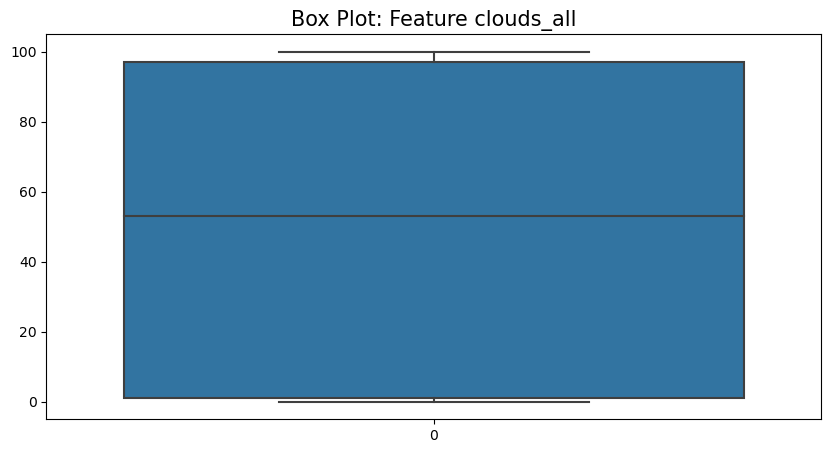

In [55]:
for num in numeric_columns:
    fig = plt.figure(figsize=(10, 5))
    sns.boxplot(train_df[num])
    plt.title('Box Plot: Feature ' + num, fontsize=15)
    plt.show()

In [56]:
sns.catplot(x='incidents', y='delay_in_seconds', data=train_df, kind='box', aspect=1.5)

ValueError: Could not interpret input 'incidents'

- Quantidade de valores nulos em cada feature

<Axes: >

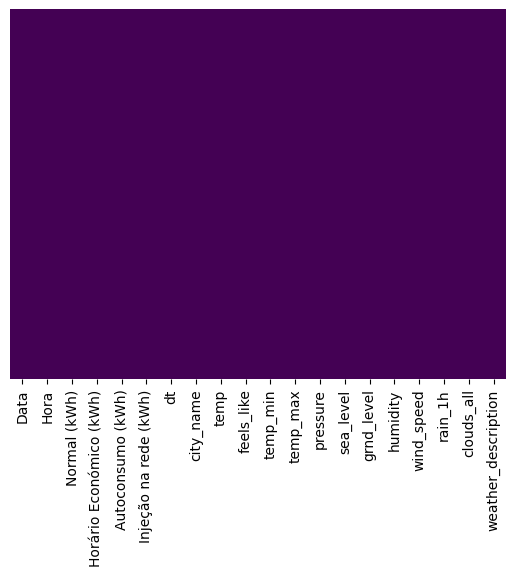

In [ ]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Histogramas para cada feature categórica

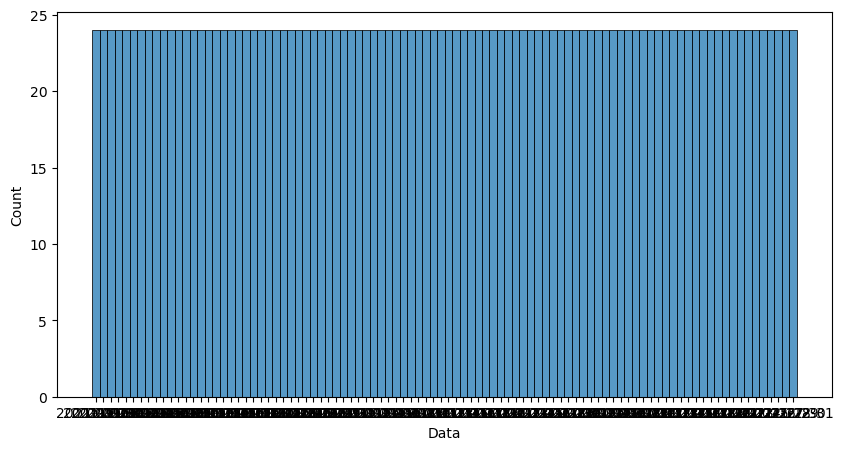

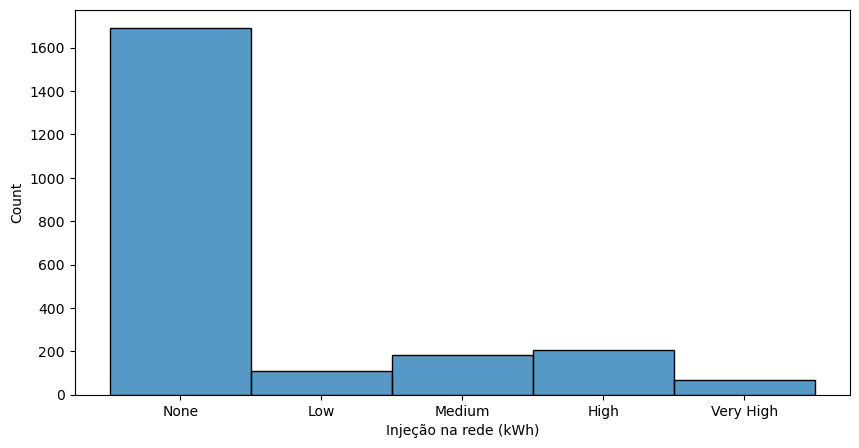

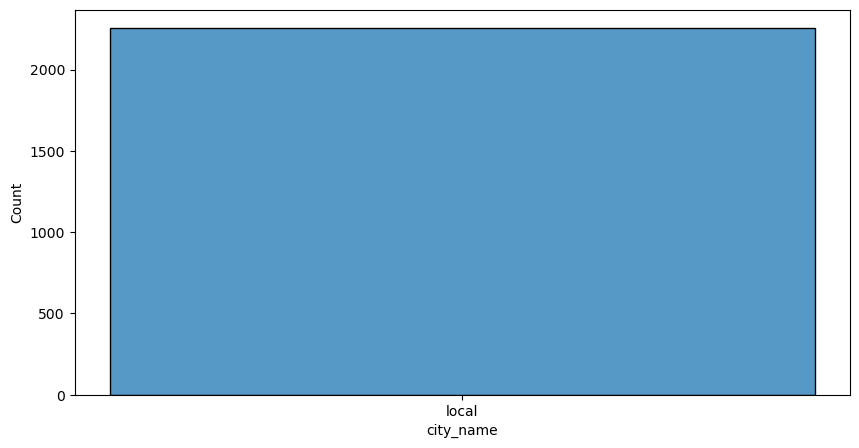

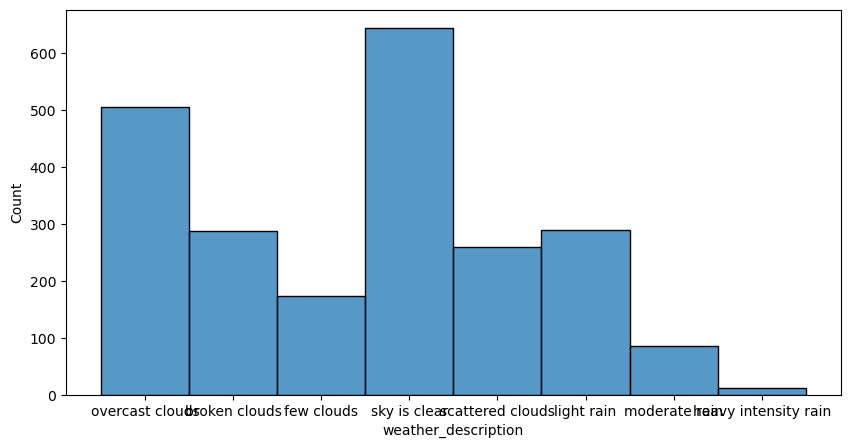

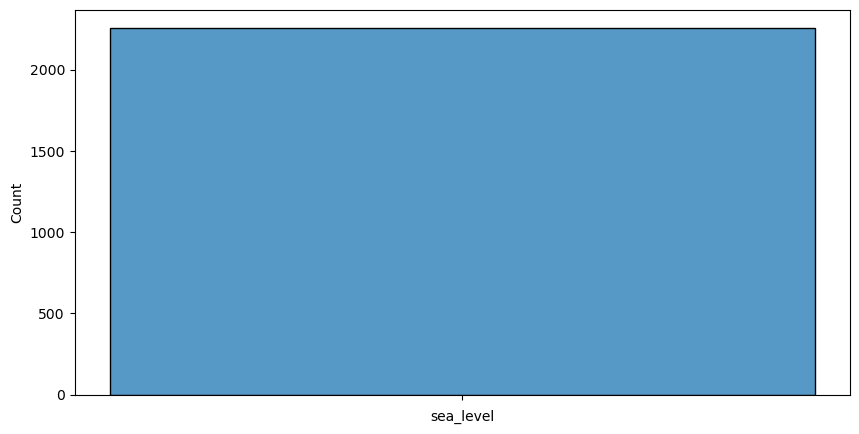

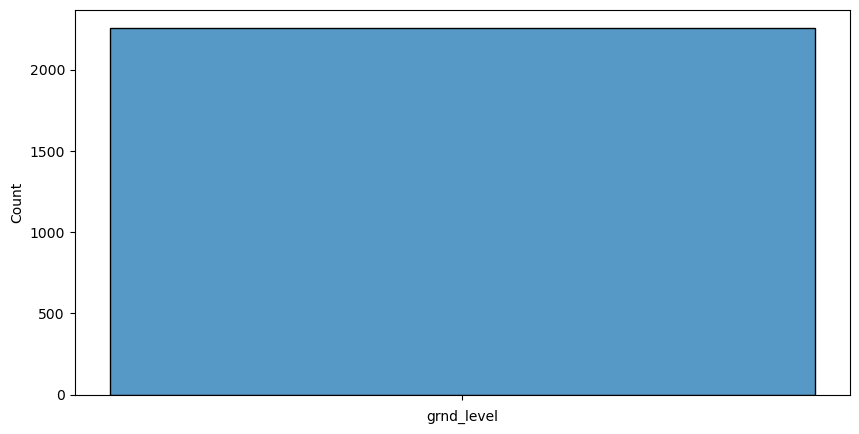

In [ ]:
for categ in categorical_columns:
    fig = plt.figure(figsize=(10, 5))
    sns.histplot(train_df[categ])

###### Observação do número de vezes que cada categoria da feature **avg_rain** aparece

In [ ]:
train_df['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

- Histograma de um conjunto univariante de observações da feature **incidents** (target)

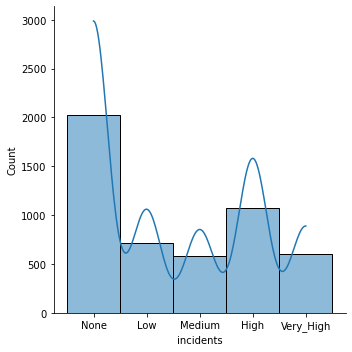

In [ ]:
train_df['incidents'].unique()
train_df['incidents'] = pd.Categorical(train_df['incidents'], categories=['None', 'Low', 'Medium', 'High', 'Very_High'])
sns.displot(train_df['incidents'], kde=True)

- Histograma de um conjunto univariante de observações da feature **avg_wind_speed**

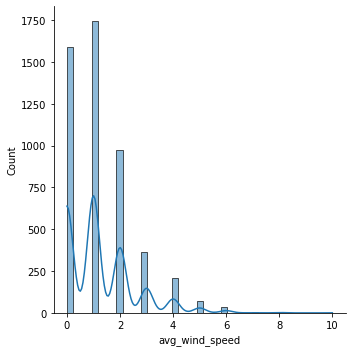

In [ ]:
sns.displot(train_df['avg_wind_speed'], kde=True)

- Histograma e outras informações uteis de um conjunto univariante de observações da feature **delay_in_seconds**

(0.0, 150.0)

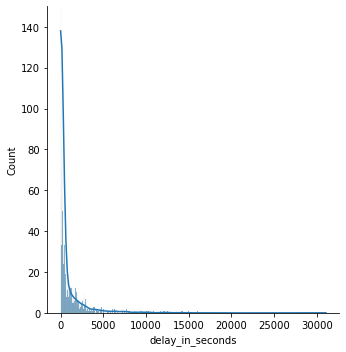

In [ ]:
sns.displot(train_df['delay_in_seconds'], kde=True)

plt.ylim(0, 150)

In [ ]:
train_df['delay_in_seconds'].describe()

count     5000.000000
mean       560.567000
std       1686.859581
min          0.000000
25%          0.000000
50%          0.000000
75%        234.000000
max      31083.000000
Name: delay_in_seconds, dtype: float64

(0.0, 50.0)

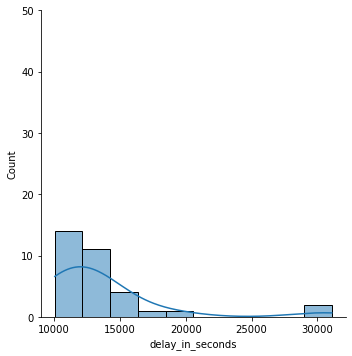

In [ ]:
sns.displot(train_df[train_df['delay_in_seconds'] > 10000]['delay_in_seconds'], kde=True)

plt.ylim(0, 50)

## Relação entre Features

- Relação entre a feature avg_rain e a feature incidents (target)

In [ ]:
train_df.groupby(by=['avg_rain', 'incidents']).count()

city_name  magnitude_of_delay  delay_in_seconds  \
avg_rain       incidents                                                    
Sem Chuva      None            1959                1959              1959   
               Low              681                 681               681   
               Medium           548                 548               548   
               High            1015                1015              1015   
               Very_High        553                 553               553   
chuva forte    None               0                   0                 0   
               Low                2                   2                 2   
               Medium             0                   0                 0   
               High               0                   0                 0   
               Very_High          1                   1                 1   
chuva fraca    None              67                  67                67   
               Low               32                  32                32   
               Medium            26                  26                26   
               High              50                  50                50   
               Very_High         39                  39                39   
chuva moderada None               2                   2                 2   
               Low                3                   3                 3   
               Medium             4                   4                 4   
               High               8                   8                 8   
               Very_High         10                  10                10   

                          affected_roads  record_date  luminosity  \
avg_rain       incidents                                            
Sem Chuva      None                 1949         1959        1959   
               Low                   629          681         681   
               Medium                537          548         548   
               High                 1008         1015        1015   
               Very_High             553          553         553   
chuva forte    None                    0            0           0   
               Low                     2            2           2   
               Medium                  0            0           0   
               High                    0            0           0   
               Very_High               1            1           1   
chuva fraca    None                   67           67          67   
               Low                    29           32          32   
               Medium                 25           26          26   
               High                   50           50          50   
               Very_High              39           39          39   
chuva moderada None                    2            2           2   
               Low                     3            3           3   
               Medium                  3            4           4   
               High                    8            8           8   
               Very_High              10           10          10   

                          avg_temperature  avg_atm_pressure  avg_humidity  \
avg_rain       incidents                                                    
Sem Chuva      None                  1959              1959          1959   
               Low                    681               681           681   
               Medium                 548               548           548   
               High                  1015              1015          1015   
               Very_High              553               553           553   
chuva forte    None                     0                 0             0   
               Low                      2                 2             2   
               Medium                   0                 0             0   
               High                     0 

- Relação entre a feature magnitude_of_delay e a feature incidents (target)

In [ ]:
train_df.groupby(by=['magnitude_of_delay', 'incidents']).count()

city_name  delay_in_seconds  affected_roads  \
magnitude_of_delay incidents                                                
MAJOR              None              23                23              15   
                   Low               62                62              61   
                   Medium            65                65              65   
                   High             162               162             162   
                   Very_High        366               366             366   
MODERATE           None               1                 1               1   
                   Low                0                 0               0   
                   Medium             2                 2               2   
                   High               3                 3               3   
                   Very_High          2                 2               2   
UNDEFINED          None            2004              2004            2002   
                   Low              656               656             602   
                   Medium           511               511             498   
                   High             908               908             901   
                   Very_High        235               235             235   

                              record_date  luminosity  avg_temperature  \
magnitude_of_delay incidents                                             
MAJOR              None                23          23               23   
                   Low                 62          62               62   
                   Medium              65          65               65   
                   High               162         162              162   
                   Very_High          366         366              366   
MODERATE           None                 1           1                1   
                   Low                  0           0                0   
                   Medium               2           2                2   
                   High                 3           3                3   
                   Very_High            2           2                2   
UNDEFINED          None              2004        2004             2004   
                   Low                656         656              656   
                   Medium             511         511              511   
                   High               908         908              908   
                   Very_High          235         235              235   

                              avg_atm_pressure  avg_humidity  avg_wind_speed  \
magnitude_of_delay incidents                                                   
MAJOR              None                     23            23              23   
                   Low                      62            62              62   
                   Medium                   65            65              65   
                   High                    162           162             162   
                   Very_High               366           366             366   
MODERATE           None                      1             1               1   
                   Low                       0             0               0   
                   Medium                    2             2               2   
                   High                      3             3               3   
                   Very_High                 2             2               2   
UNDEFINED          None                   2004          2004            2004   
                   Low                     656           656             656   
                   Medium                  511           511             511   
                   High                    908           908             908   
                   Very_High               235           235             235   

                              avg_precipitation  avg_rain  
magnitude_of_delay incidents            

In [ ]:
train_df.groupby(by=['delay_in_seconds', 'incidents']).mean()

avg_temperature  avg_atm_pressure  avg_humidity  \
delay_in_seconds incidents                                                    
0                None             13.919166       1018.900356     77.081851   
                 Low              10.811881       1018.490099     83.193069   
                 Medium           14.113350       1018.254408     76.178841   
                 High             14.298938       1015.827011     75.928680   
                 Very_High        12.000000       1012.000000     67.000000   
...                                     ...               ...           ...   
31083            None                   NaN               NaN           NaN   
                 Low                    NaN               NaN           NaN   
                 Medium                 NaN               NaN           NaN   
                 High                   NaN               NaN           NaN   
                 Very_High        16.000000       1022.000000     77.000000   

                            avg_wind_speed  avg_precipitation  
delay_in_seconds incidents                                     
0                None             1.134723                0.0  
                 Low              1.420792                0.0  
                 Medium           1.256927                0.0  
                 High             1.201062                0.0  
                 Very_High        4.000000                0.0  
...                                    ...                ...  
31083            None                  NaN                NaN  
                 Low                   NaN                NaN  
                 Medium                NaN                NaN  
                 High                  NaN                NaN  
                 Very_High        1.000000                0.0  

[5930 rows x 5 columns]

# Análise do dataset de teste

In [ ]:
test_df.head()

city_name magnitude_of_delay  delay_in_seconds  \
0  Guimaraes          UNDEFINED              1211   
1  Guimaraes          UNDEFINED                 0   
2  Guimaraes          UNDEFINED                 0   
3  Guimaraes          UNDEFINED               140   
4  Guimaraes          UNDEFINED                 0   

                   affected_roads       record_date luminosity  \
0  N101,N101,N101,N101,N101,N101,  2021-04-13 19:00      LIGHT   
1        N101,N101,N101,N101,N101  2021-10-13 04:00       DARK   
2        N101,N101,N101,N101,N101  2021-07-18 19:00      LIGHT   
3   N101,R206,N101,N101,N101,N101  2021-10-30 15:00      LIGHT   
4        N101,N101,N101,N101,N101  2021-10-18 10:00      LIGHT   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0             15.0            1018.0          80.0             0.0   
1             16.0            1018.0          41.0             2.0   
2             22.0            1017.0          71.0             0.0   
3             18.0            1008.0          81.0             3.0   
4             20.0            1022.0          86.0             0.0   

   avg_precipitation   avg_rain  
0                0.0  Sem Chuva  
1                0.0  Sem Chuva  
2                0.0  Sem Chuva  
3                0.0  Sem Chuva  
4                0.0  Sem Chuva

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           1206 non-null   object 
 1   magnitude_of_delay  1206 non-null   object 
 2   delay_in_seconds    1206 non-null   int64  
 3   affected_roads      1184 non-null   object 
 4   record_date         1206 non-null   object 
 5   luminosity          1206 non-null   object 
 6   avg_temperature     1206 non-null   float64
 7   avg_atm_pressure    1206 non-null   float64
 8   avg_humidity        1206 non-null   float64
 9   avg_wind_speed      1206 non-null   float64
 10  avg_precipitation   1206 non-null   float64
 11  avg_rain            1206 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 113.2+ KB


In [ ]:
test_df.describe()

delay_in_seconds  avg_temperature  avg_atm_pressure  avg_humidity  \
count       1206.000000      1206.000000       1206.000000   1206.000000   
mean         565.080431        14.649254       1018.024876     73.865672   
std         1584.544376         4.691180          5.338753     17.202341   
min            0.000000         2.000000        999.000000      7.000000   
25%            0.000000        11.000000       1015.000000     62.000000   
50%            0.000000        14.000000       1018.000000     77.000000   
75%          268.750000        18.000000       1022.000000     90.000000   
max        14866.000000        30.000000       1031.000000    100.000000   

       avg_wind_speed  avg_precipitation  
count     1206.000000             1206.0  
mean         1.332504                0.0  
std          1.337510                0.0  
min          0.000000                0.0  
25%          0.000000                0.0  
50%          1.000000                0.0  
75%          2.000000                0.0  
max          9.000000                0.0

In [ ]:
train_df.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [ ]:
test_df.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        22
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
dtype: int64

In [ ]:
record_date = pd.DatetimeIndex(train_df['record_date'])

train_df['hour'] = record_date.hour
train_df['day'] = record_date.day
train_df['month'] = record_date.month
train_df['weekday'] = record_date.weekday

In [ ]:
train_df['hour'].value_counts()

3     223
9     217
7     214
13    213
6     212
14    212
4     210
0     209
1     209
5     209
20    208
2     208
11    207
15    207
8     206
10    206
19    206
12    206
16    206
23    206
22    204
17    203
18    201
21    198
Name: hour, dtype: int64

In [ ]:
train_df['day'].value_counts()

22    185
23    183
18    181
20    180
21    176
3     176
2     175
24    174
19    174
11    173
28    169
16    168
17    165
12    165
4     164
30    163
26    161
25    160
5     160
29    160
10    159
9     157
6     155
13    155
15    154
27    153
14    151
8     146
7     145
1     144
31     69
Name: day, dtype: int64

In [ ]:
train_df['month'].value_counts()

12    607
3     580
11    580
4     579
10    562
6     560
7     551
9     393
1     299
5     229
2      60
Name: month, dtype: int64

In [ ]:
train_df['weekday'].value_counts()

2    734
1    725
3    723
4    711
6    707
0    706
5    694
Name: weekday, dtype: int64

## Comparação dos dados do dataset de treino com os dados do dataset de teste

In [ ]:
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [city_name, magnitude_of_delay, delay_in_seconds, affected_roads, record_date, luminosity, avg_temperature, avg_atm_pressure, avg_humidity, avg_wind_speed, avg_precipitation, avg_rain, incidents, hour, day, month, weekday]
Index: []

In [ ]:
test_df[test_df.duplicated()]


Empty DataFrame
Columns: [city_name, magnitude_of_delay, delay_in_seconds, affected_roads, record_date, luminosity, avg_temperature, avg_atm_pressure, avg_humidity, avg_wind_speed, avg_precipitation, avg_rain]
Index: []

### Obtenção das features númericas

In [ ]:
[column for column, dtype in zip(train_df.columns, train_df.dtypes) if dtype.kind in ['i', 'f']]

['delay_in_seconds',
 'avg_temperature',
 'avg_atm_pressure',
 'avg_humidity',
 'avg_wind_speed',
 'avg_precipitation',
 'hour',
 'day',
 'month',
 'weekday']

### Obtenção das features categoricas

In [ ]:
[column for column, dtype in zip(train_df.columns, train_df.dtypes) if dtype.kind not in ['i', 'f']]

['city_name',
 'magnitude_of_delay',
 'affected_roads',
 'record_date',
 'luminosity',
 'avg_rain',
 'incidents']